In [1]:
#나중에 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 없을까?

In [5]:
#차원 = 특성
#1차원 배열에서는 원소의 개수가 차원이고, 2차원 배열에서는 행과 열이 차원이 된다.

In [7]:
#대표적인 차원 축소 알고리즘 : 주성분 분석

#주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해한다. 분산이 큰 방향이란, 데이터를 잘 표현하는 어떤 벡터! = 주성분
#주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.
#하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.

#일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.

In [9]:
import numpy as np
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)

In [11]:
#PCA 클래스의 객체를 만들어 주성분 분석 알고리즘 이용
from sklearn.decomposition import PCA
pca = PCA(n_components=50) #주성분 개수 지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [13]:
#PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다. -> 이 배열의 크기 확인
print(pca.components_.shape)

(50, 10000)


In [15]:
#첫 번째 차원은 주성분 갯수, 두 번째 차원은 원본 데이터의 특성 개수와 같다.

In [19]:
#각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력 -> 간단한 유틸리티 함수 draw_fruits() 만들기 !
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1): #figsize는 ratio 매개변수에 비례하여 커진다. ratio의 기본값은 1이다.
    n=len(arr) #arr은 샘플 개수
    #한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
    rows = int(np.ceil(n/10))
    #행이 1개이면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize = (cols*ratio, rows*ratio), squeeze=False) #squeeze=False: axs를 항상 2D 배열로 유지
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: #n개까지만 그린다. / i*10 + j는 1차원 배열에서 몇 번째 이미지인지를 의미
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off') #눈금과 테두리 제거
    plt.show()

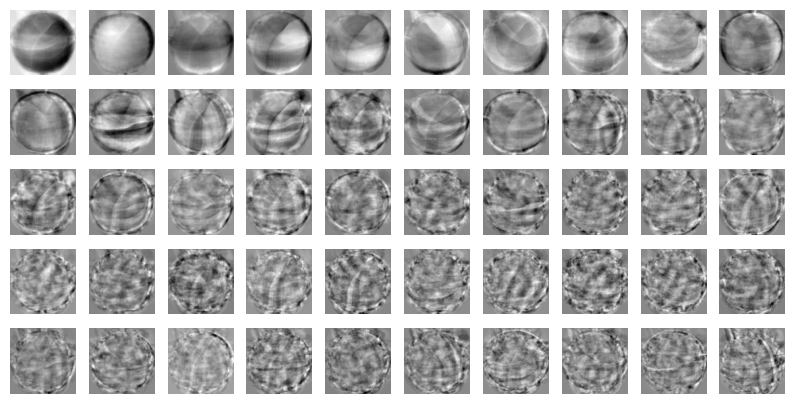

In [21]:
#주성분을 그림으로 그리기 (원본 데이터와 차원이 같으므로 이미지처럼 출력하는 데에 문제 없다.)
draw_fruits(pca.components_.reshape(-1,100,100))

In [23]:
#이 주성분은 원본 데이터에서 분산이 가장 큰 방향을 순서대로 나타낸 것이다.
#한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.

In [25]:
#원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄이기 !
print(fruits_2d.shape)

(300, 10000)


In [27]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [29]:
#원본 데이터 재구성 - 원상 복구 해보기

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


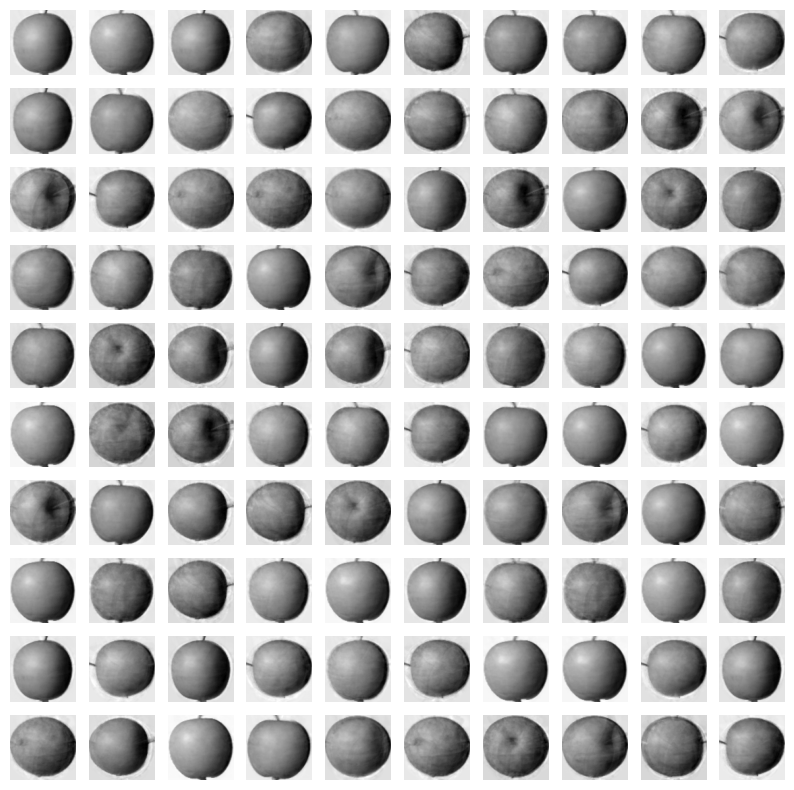

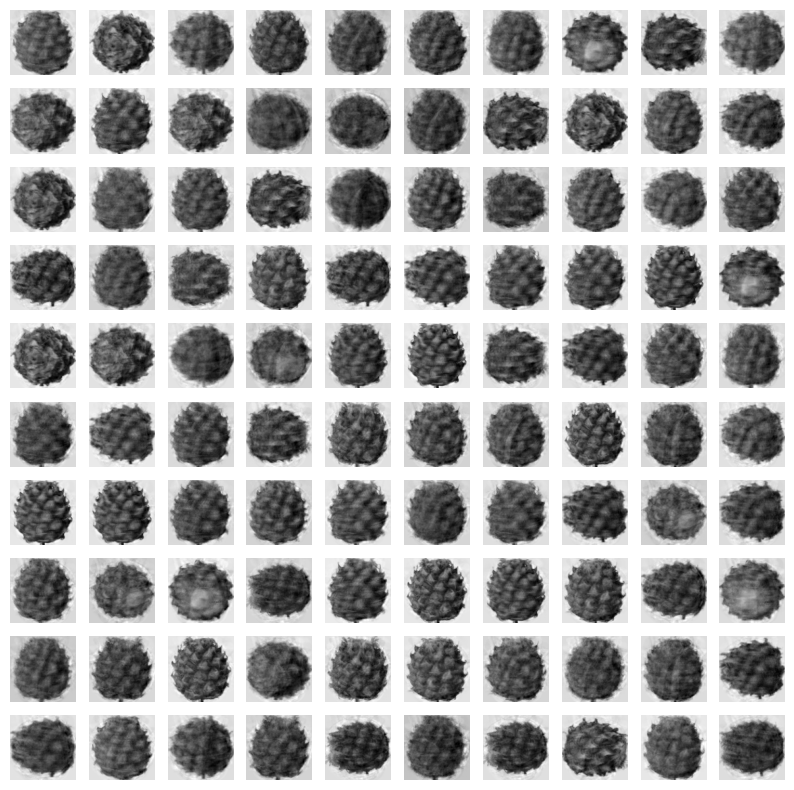

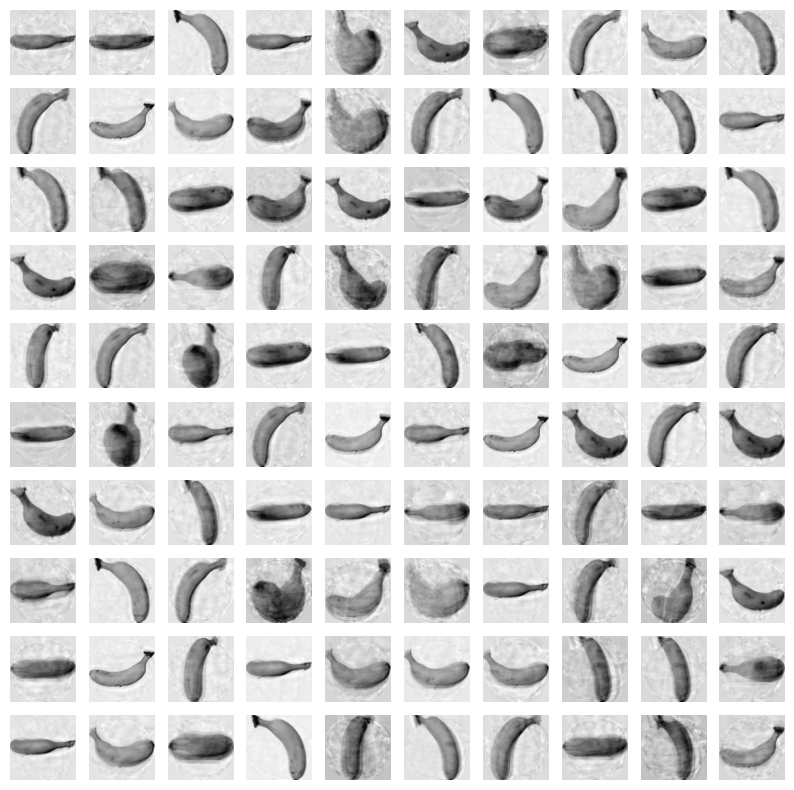

In [31]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [33]:
#설명된 분산

#주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다.
#PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.
#당연히 첫번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [35]:
#50개의 주성분으로 표현하고 있는 총 분산 비율

print(np.sum(pca.explained_variance_ratio_))

0.9215250212117856


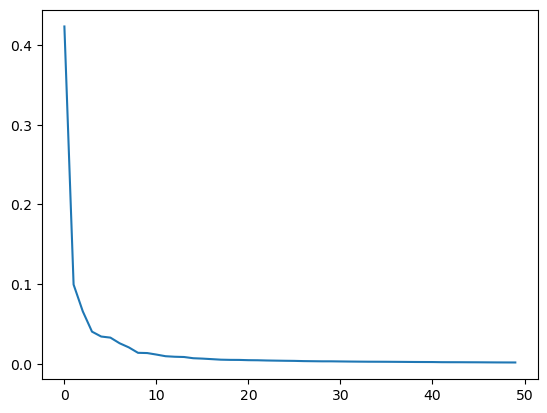

In [37]:
#설명된 분산의 비율을 그래프로 그리면 적절한 주성분의 개수를 찾는 데 도움이 된다.

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [39]:
#처음 10개의 주성분이 대부분의 분산을 표현하고 있음을 알 수 있다.

In [41]:
#PCA로 축소한 데이터를 지도학습에 적용해 보기 - 로지스틱 회귀 모델 사용

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [43]:
#지도 학습 모델을 사용하려고 하므로 타깃값 만들기

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [45]:
#축소한 데이터 사용하기 전에, 원본 데이터 먼저 사용

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) #교차 검증의 점수
print(np.mean(scores['fit_time'])) #각 교차 검증 폴드의 훈련 시간

0.9966666666666667
0.23488774299621581


In [47]:
#fruits_pca를 사용했을 때와 비교

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.005919408798217773


In [49]:
#훈련 속도가 매우 빨라졌다.

In [51]:
#n_components 매개변수에 주성분의 개수 대신에 원하는 설명된 분산의 비율도 입력할 수 있다.
#PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

pca = PCA(n_components=0.5) #설명된 분산의 50%에 달하는 주성분을 찾아라
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [53]:
print(pca.n_components_)

2


In [55]:
#2개의 주성분(특성)만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다 !

In [57]:
#이 모델로 원본 데이터 변환하기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) #주성분이 2개이므로 (300, 2)가 될 것

(300, 2)


In [59]:
#2개의 특성만 사용하고도 교차 검증의 결과가 좋을지 확인

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.010783958435058593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [61]:
#2개의 특성만을 사용했음에도 99%의 정확도 달성 !

In [63]:
#차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


In [65]:
#클러스터는 각각 110개, 99개, 91개의 샘플을 포함하고 있다.

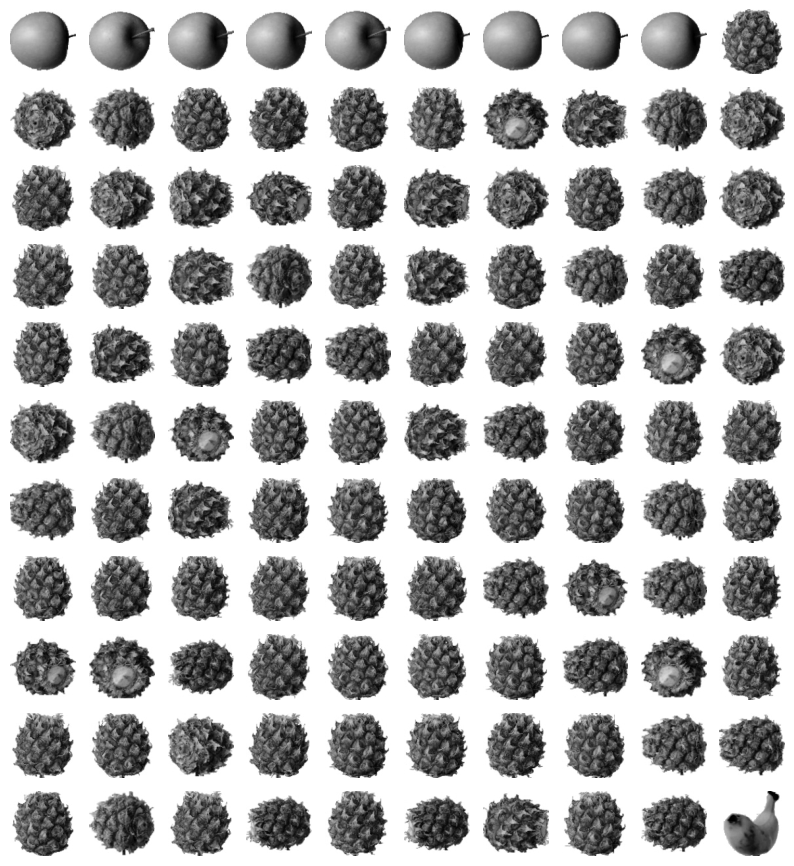

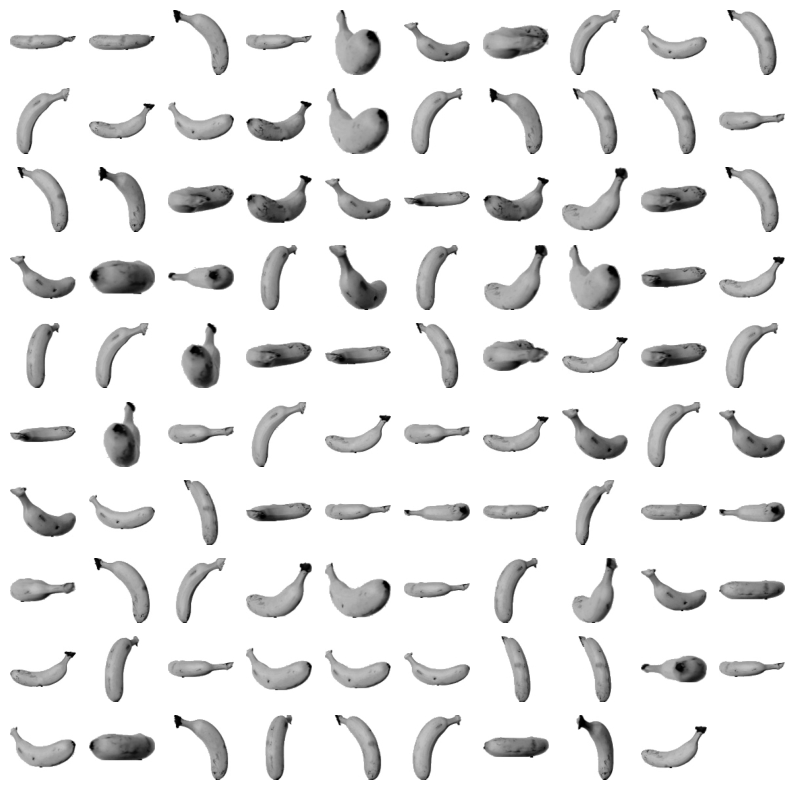

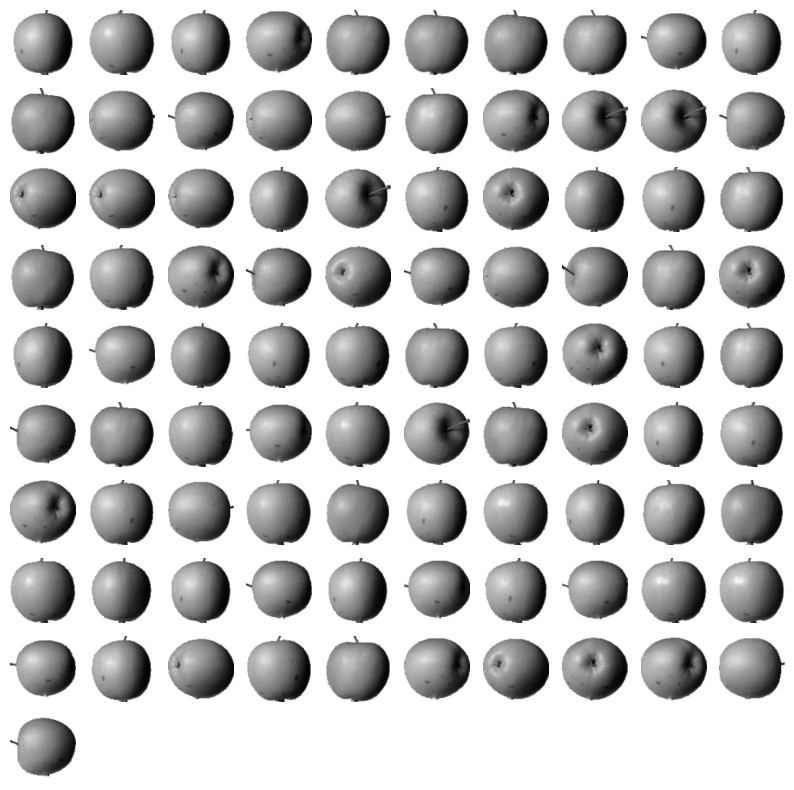

In [67]:
#k-means가 찾은 레이블을 사용해 과일 이미지 출력해보기

for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

In [69]:
#2절에서 찾은 클러스터와 비슷하게 사과와 파인애플은 조금 혼동되는 면이 있지만 .. 비슷하다 !

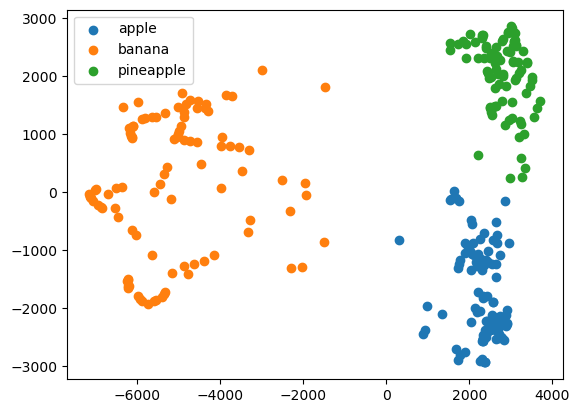

In [73]:
#훈련 데이터의 차원을 줄이면 얻을 수 있는 장점 -> 시각화 !
#fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있다.

#km.labels_를 사용해 클러스터 별로 나누어 산점도 그리기
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [75]:
#각 클러스터의 산점도가 아주 잘 구분된다 ! 
#그래서 2개의 특성만을 사용했음에도 로지스틱 회귀 모델의 교차검증 점수가 99%에 달했던 것.